In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def f(L,t,mu=(0.07349e24/5.9736e24),G=6.67e-11,mt=5.9736e24,d=3.844e8,w=2.6617e-6):
    r,phi,pr,pp=L

    drdt= pr
    dphidt= pp/r**2
    dprdt=((pp**2)/r**3)-(((G*mt/d**3))*((1/r**2)+(mu/(1+(r**2)-2*r*np.cos(phi-w*t))**(3/2))*(r-np.cos(phi-w*t))))
    dppdt=-(G*mt/d**3)*(mu*r/(1+(r**2)-2*r*np.cos(phi-w*t))**3/2)*np.sin(phi-w*t)            
    return np.array([drdt,dphidt,dprdt,dppdt])


In [3]:

t = np.arange(0,259200,1)

V=np.linalg.norm(np.array([11000*np.cos(2.09),11000*np.sin(2.09)]))

phi0=0.5
pr0=V*np.cos(2.09-phi0)
pp0=(6.3781e6/3.844e8)*V*np.sin(2.09-phi0)

r0=np.array([6.3781e6,phi0,pr0,pp0])

sol = odeint(f, r0, t, args=(1.3,))

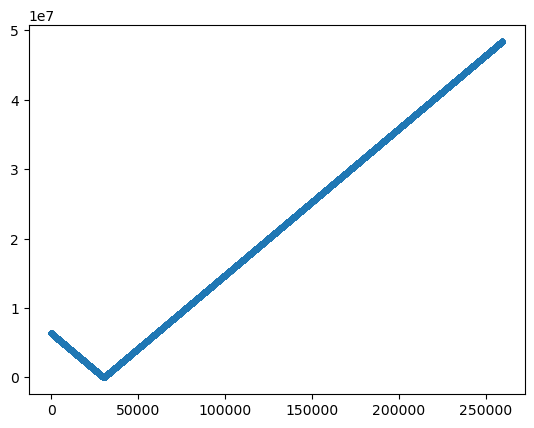

In [4]:
plt.scatter(t,sol[:,0],marker='.')

In [5]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1],r[2],r[3]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],r[2]+0.5*h*K1[2],r[3]+0.5*h*K1[3]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2],r[3]+0.5*h*K2[3]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2],r[3]+h*K3[3]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

In [6]:
def Adaptativo(f, r0, t):
    """
    Función para realizar integración adaptativa utilizando el método de Runge-Kutta de cuarto orden.
    """
    h = t[1] - t[0]
    tf = t[-1]
    t = t[0]
    r = r0
    
    Time = np.array([t])
    Vector = r
    
    Steps = np.array([h])
    tolerancia = h ** 5
    
    while t < tf:
        Delta1 = Increment(f, r, t, h)
        Delta2 = Increment(f, r, t, 0.5 * h)
        
        error = 16 * (np.abs(Delta2 - Delta1)) / 15
        error_max = np.max(error)
        tolerancia_max = np.max(tolerancia)
        s = max([(error_max / tolerancia_max) * 0.2, 1e-8])
        
        hmax = h / s
        
        if s > 2:
            h = hmax
            t += h
            Delta1 = Increment(f, r, t, h)
            Delta2 = Increment(f, r, t, 0.5 * h)
        elif s < 2:
            t += h
            r += Delta2
        if h < hmax:
            h = 2 * h
        
        r += Delta1
        
        Steps = np.append(Steps, h)
        Time = np.append(Time, t)
        Vector = np.vstack((Vector, r))
    
    return Time, Steps, Vector

In [7]:
def Error(delta1,delta2):
    error=[]
  
    for i in range(4):
        e=16*(abs(delta2[i]-delta1[i]))/15
        error.append(e)
    return error
    

In [ ]:
soll=Adaptativo(f,r0,t)
t1=np.arange(len(soll[1][:,1]))

plt.scatter(t1,soll[1][:,1],marker='.')

C:\Users\Corsair PC.DESKTOP-0THQH30\AppData\Local\Temp\ipykernel_7464\3345194177.py:7: RuntimeWarning: overflow encountered in scalar power
  dppdt=-(G*mt/d**3)*(mu*r/(1+(r**2)-2*r*np.cos(phi-w*t))**3/2)*np.sin(phi-w*t)
C:\Users\Corsair PC.DESKTOP-0THQH30\AppData\Local\Temp\ipykernel_7464\3345194177.py:6: RuntimeWarning: overflow encountered in scalar power
  dprdt=((pp**2)/r**3)-(((G*mt/d**3))*((1/r**2)+(mu/(1+(r**2)-2*r*np.cos(phi-w*t))**(3/2))*(r-np.cos(phi-w*t))))
C:\Users\Corsair PC.DESKTOP-0THQH30\AppData\Local\Temp\ipykernel_7464\3345194177.py:5: RuntimeWarning: overflow encountered in scalar power
  dphidt= pp/r**2
C:\Users\Corsair PC.DESKTOP-0THQH30\AppData\Local\Temp\ipykernel_7464\3345194177.py:6: RuntimeWarning: invalid value encountered in scalar divide
  dprdt=((pp**2)/r**3)-(((G*mt/d**3))*((1/r**2)+(mu/(1+(r**2)-2*r*np.cos(phi-w*t))**(3/2))*(r-np.cos(phi-w*t))))
